In [1]:
%run /Users/denis/Documents/Projects/scripts/init.ipy
os.chdir(os.getcwd().replace('/pipeline/notebooks', ''));

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:

Find out what's changed in ggplot2 at
https://github.com/tidyverse/ggplot2/releases.




In [3]:
##### 3. Functions #####
# Read GMT file
def readGMT(infile):
    gmt = {}
    with open(infile) as openfile:
        for line in openfile.read().split('\n'):
            split_line = line.strip().split('\t')
            if split_line[0]:
                gmt[split_line[0]] = [x.split(',')[0] for x in split_line[2:]]
    return gmt

# Reverse GMT
def reverseGMT(gmt):
    gmt_list = [{'term': term, 'gene_symbol': gene, 'value': 1} for term, genes in gmt.items() for gene in genes]
    gmt_dataframe = pd.DataFrame(gmt_list).pivot_table(index='gene_symbol', columns='term', values='value', fill_value=0)
    reverse_gmt = {gene_symbol: [key for key, value in rowData.items() if value] for gene_symbol, rowData in gmt_dataframe.iterrows()}
    return reverse_gmt


In [25]:
# Read GMT
gmt = {os.path.basename(x)[:-len('.txt')]: readGMT(x) for x in glob.glob('libraries.dir/*.txt')}

In [26]:
# Read reverse GMT
reverse_gmt = {key: reverseGMT(value) for key, value in gmt.items()}

In [48]:
def getGMTCounts(gmt):
    counts = {library_name: {key: len(value) for key, value in library_gmt.items()} for library_name, library_gmt in gmt.items()}
    count_dataframe = pd.DataFrame([{'Library': group, 'subgroup': key, 'count': value}for group, count_dict in counts.items() for key, value in count_dict.items()])
    return count_dataframe

In [49]:
gmt_counts = getGMTCounts(gmt)
gmt_counts.head()

Library  count  \
0  GO_Molecular_Function_2018     11   
1  GO_Molecular_Function_2018      6   
2  GO_Molecular_Function_2018     43   
3  GO_Molecular_Function_2018    375   
4  GO_Molecular_Function_2018     23   

                                            subgroup  
0          semaphorin receptor activity (GO:0017154)  
1                     7SK snRNA binding (GO:0097322)  
2             androgen receptor binding (GO:0050681)  
3  transcription regulatory region DNA binding (G...  
4  protein phosphatase inhibitor activity (GO:000...

In [50]:
reverse_gmt_counts = getGMTCounts(reverse_gmt)
reverse_gmt_counts.head()

Library  count subgroup
0  GO_Molecular_Function_2018    435         
1  GO_Molecular_Function_2018      2     A1CF
2  GO_Molecular_Function_2018      6      A2M
3  GO_Molecular_Function_2018      1    A2ML1
4  GO_Molecular_Function_2018      2   A4GALT

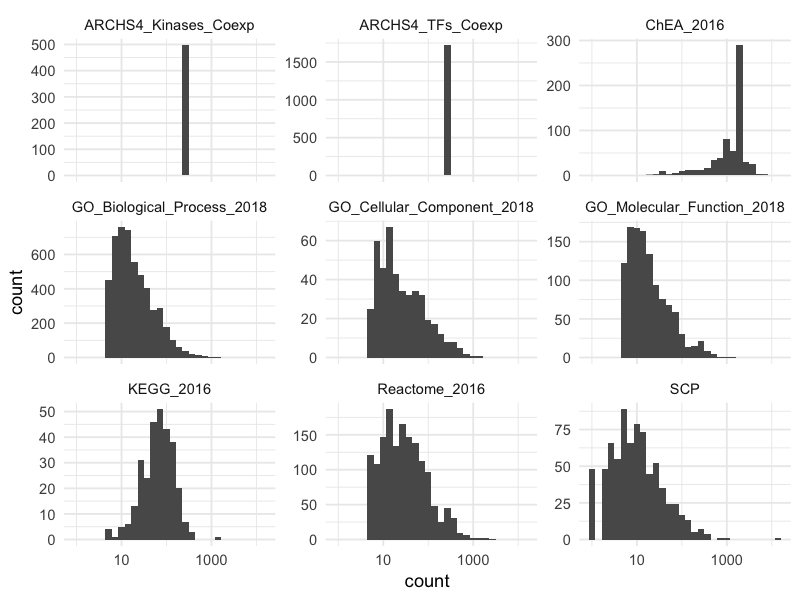

In [34]:
%%R -i gmt_counts -h 600 -w 800 -r 120
ggplot(gmt_counts, aes(x=count)) +
    geom_histogram() +
    facet_wrap(~group, scales='free_y') +
    scale_x_log10() + 
    theme_minimal()

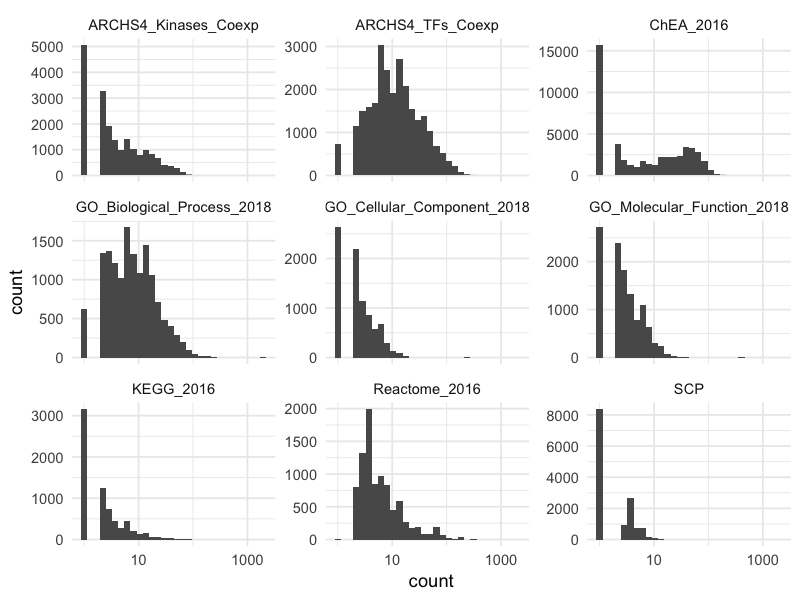

In [44]:
%%R -i reverse_gmt_counts -h 600 -w 800 -r 120
ggplot(reverse_gmt_counts, aes(x=count)) +
    geom_histogram() +
    facet_wrap(~group, scales='free_y') +
    scale_x_log10() + 
    theme_minimal()

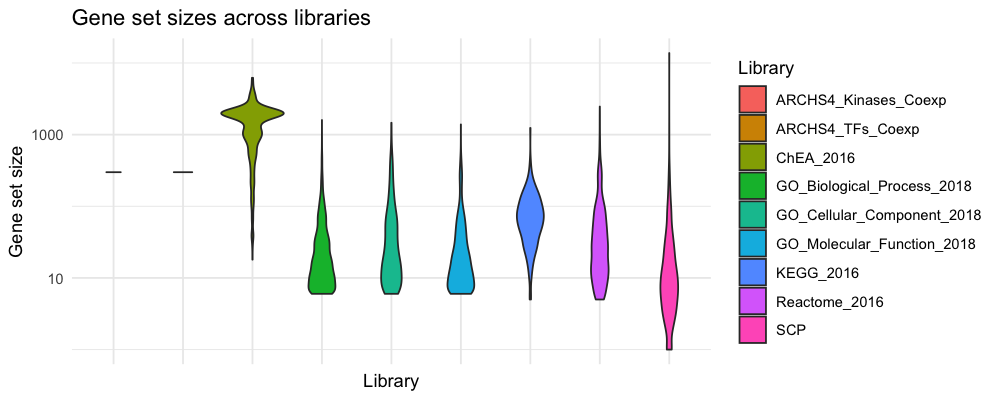

In [54]:
%%R -i gmt_counts -h 400 -w 1000 -r 120
ggplot(gmt_counts, aes(x=Library, y=count, fill=Library)) +
    geom_violin() +
    scale_y_log10() + 
    theme_minimal() +
    theme(axis.text.x=element_blank()) +
    xlab('Library') + 
    ylab('Gene set size') +
    ggtitle('Gene set sizes across libraries')

In [56]:
reverse_gmt_counts.head()

Library  count subgroup
0  GO_Molecular_Function_2018    435         
1  GO_Molecular_Function_2018      2     A1CF
2  GO_Molecular_Function_2018      6      A2M
3  GO_Molecular_Function_2018      1    A2ML1
4  GO_Molecular_Function_2018      2   A4GALT

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



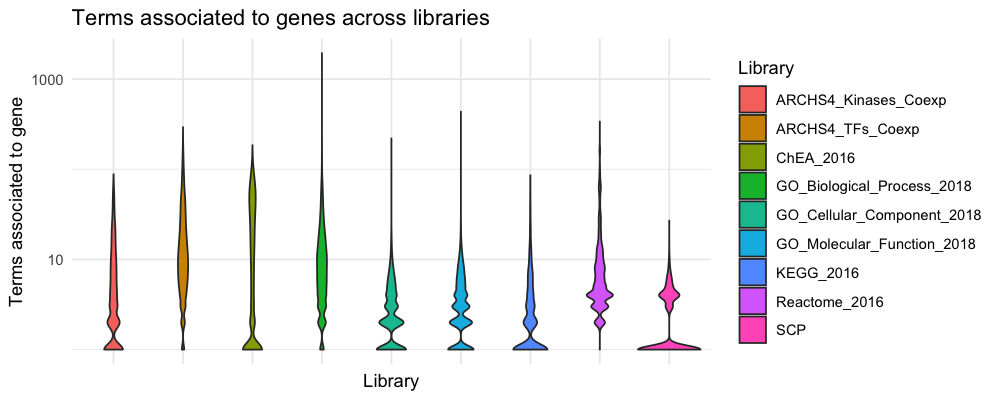

In [57]:
%%R -i reverse_gmt_counts -h 400 -w 1000 -r 120
ggplot(reverse_gmt_counts, aes(x=Library, y=count, fill=Library)) +
    geom_violin() +
    scale_y_log10() + 
    theme_minimal() +
    theme(axis.text.x=element_blank()) +
    xlab('Library') + 
    ylab('Terms associated to gene') +
    ggtitle('Terms associated to genes across libraries')

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



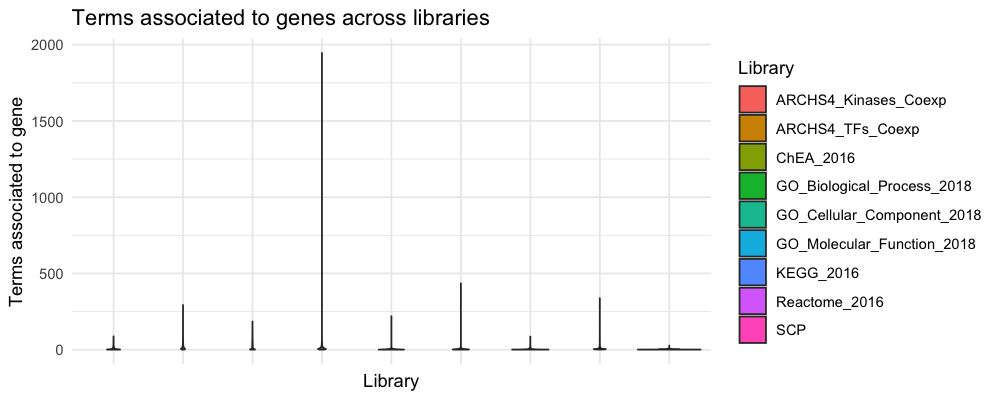

In [119]:
%%R -i reverse_gmt_counts -h 400 -w 1000 -r 120
ggplot(reverse_gmt_counts, aes(x=Library, y=count, fill=Library)) +
    geom_violin() +
    theme_minimal() +
    theme(axis.text.x=element_blank()) +
    xlab('Library') + 
    ylab('Terms associated to gene') +
    ggtitle('Terms associated to genes across libraries')

In [66]:
# Cast
cast_dataframe = reverse_gmt_counts.pivot_table(index='subgroup', columns='Library', values='count', fill_value=0)
print(cast_dataframe.shape)
cast_dataframe.head()

(58709, 9)


Library   ARCHS4_Kinases_Coexp  ARCHS4_TFs_Coexp  ChEA_2016  \
subgroup                                                      
---                          0                 0          1   
-109612                      0                 0          1   
-12930                       0                 0          1   
-137431                      0                 0          1   
-149213                      0                 0          1   

Library   GO_Biological_Process_2018  GO_Cellular_Component_2018  \
subgroup                                                           
---                                0                           0   
-109612                            0                           0   
-12930                             0                           0   
-137431                            0                           0   
-149213                            0                           0   

Library   GO_Molecular_Function_2018  KEGG_2016  Reactome_2016  SCP  
subgroup                                                             
---                                0          0              0    0  
-109612                            0          0              0    0  
-12930                             0          0              0    0  
-137431                            0          0              0    0  
-149213                            0          0              0    0

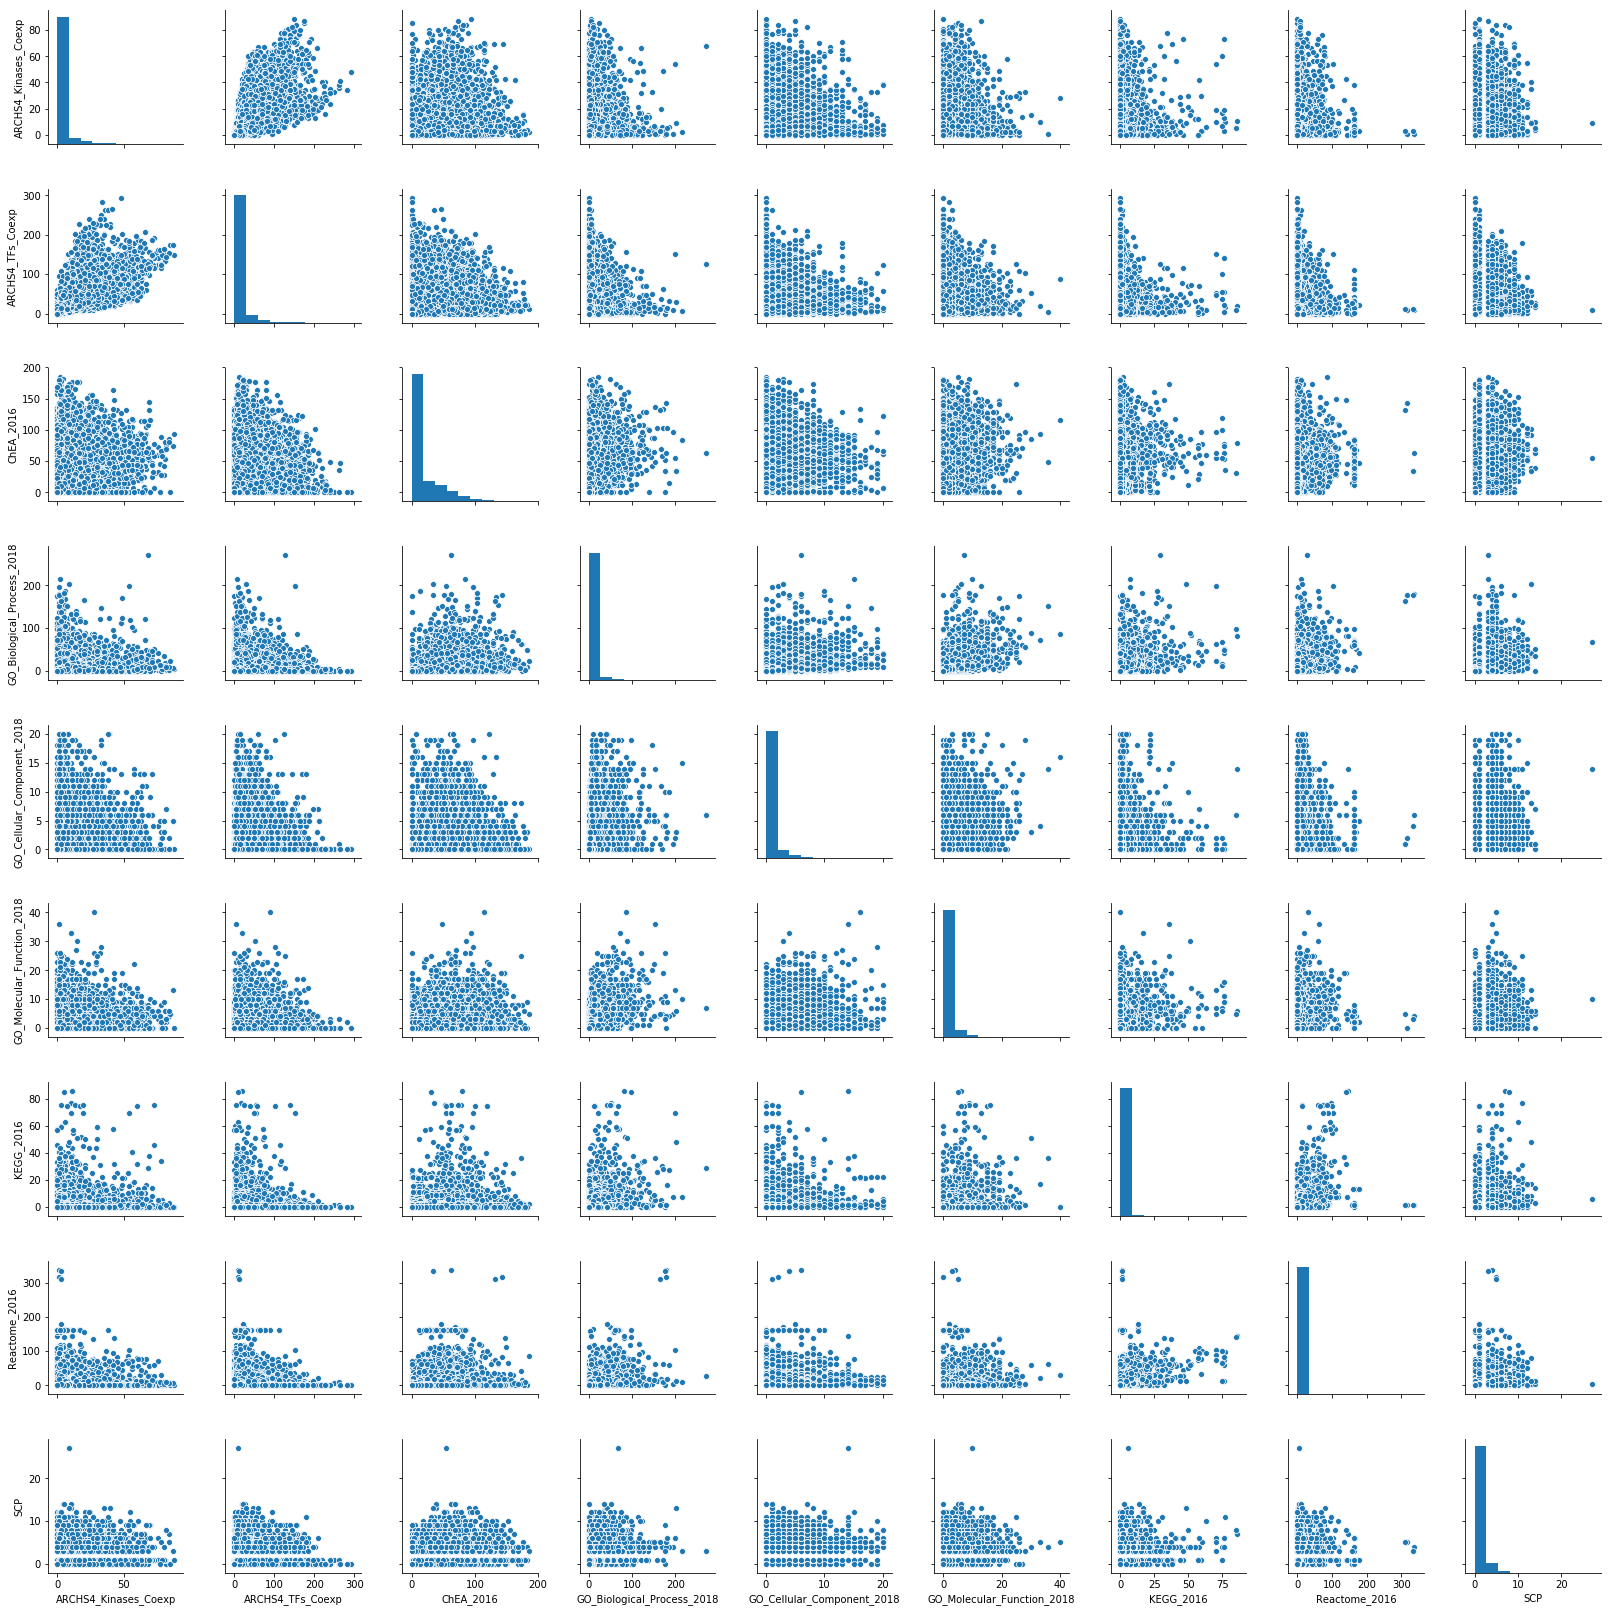

In [67]:
sns.pairplot(cast_dataframe);

In [68]:
reverse_gmt_counts.head()

Library  count subgroup
0  GO_Molecular_Function_2018    435         
1  GO_Molecular_Function_2018      2     A1CF
2  GO_Molecular_Function_2018      6      A2M
3  GO_Molecular_Function_2018      1    A2ML1
4  GO_Molecular_Function_2018      2   A4GALT

In [73]:
test_dataframe = reverse_gmt_counts[reverse_gmt_counts['subgroup'] != ''].copy()
test_dataframe['count2'] = test_dataframe['count']
test_dataframe['Library2'] = test_dataframe['Library']
test_dataframe.head()

Library  count subgroup  count2  \
1  GO_Molecular_Function_2018      2     A1CF       2   
2  GO_Molecular_Function_2018      6      A2M       6   
3  GO_Molecular_Function_2018      1    A2ML1       1   
4  GO_Molecular_Function_2018      2   A4GALT       2   
5  GO_Molecular_Function_2018      3    A4GNT       3   

                     Library2  
1  GO_Molecular_Function_2018  
2  GO_Molecular_Function_2018  
3  GO_Molecular_Function_2018  
4  GO_Molecular_Function_2018  
5  GO_Molecular_Function_2018

# ---

In [120]:
gene_auc_dataframe = pd.read_table('./s4-merged_auc.dir/gene_auc.txt')
gene_auc_dataframe.head()

gene_symbol  auc    normalization               library
0  1300017J02RIK  NaN  autorif_overlap  ARCHS4_Kinases_Coexp
1  1700013H16RIK  NaN  autorif_overlap  ARCHS4_Kinases_Coexp
2  1700093K21RIK  NaN  autorif_overlap  ARCHS4_Kinases_Coexp
3  2010109I03RIK  NaN  autorif_overlap  ARCHS4_Kinases_Coexp
4  2410089E03RIK  NaN  autorif_overlap  ARCHS4_Kinases_Coexp

In [123]:
frac_dataframe = (gene_auc_dataframe.dropna().groupby(['normalization', 'library']).size()/gene_auc_dataframe.groupby(['normalization', 'library']).size()).rename('fraction_genes_with_auc').to_frame().reset_index().query("normalization in ['autorif_overlap_zscore', 'correlation', 'generif_overlap_zscore', 'random', 'zscore']")
frac_dataframe.sort_values('fraction_genes_with_auc')

normalization                     library  \
87                  zscore                   KEGG_2016   
69                  random                   KEGG_2016   
70                  random               Reactome_2016   
88                  zscore               Reactome_2016   
85                  zscore  GO_Cellular_Component_2018   
67                  random  GO_Cellular_Component_2018   
24             correlation                   KEGG_2016   
60  generif_overlap_zscore                   KEGG_2016   
15  autorif_overlap_zscore                   KEGG_2016   
86                  zscore  GO_Molecular_Function_2018   
68                  random  GO_Molecular_Function_2018   
25             correlation               Reactome_2016   
22             correlation  GO_Cellular_Component_2018   
89                  zscore                         SCP   
71                  random                         SCP   
61  generif_overlap_zscore               Reactome_2016   
58  generif_overlap_zscore  GO_Cellular_Component_2018   
16  autorif_overlap_zscore               Reactome_2016   
13  autorif_overlap_zscore  GO_Cellular_Component_2018   
66                  random  GO_Biological_Process_2018   
84                  zscore  GO_Biological_Process_2018   
23             correlation  GO_Molecular_Function_2018   
81                  zscore        ARCHS4_Kinases_Coexp   
63                  random        ARCHS4_Kinases_Coexp   
59  generif_overlap_zscore  GO_Molecular_Function_2018   
14  autorif_overlap_zscore  GO_Molecular_Function_2018   
26             correlation                         SCP   
65                  random                   ChEA_2016   
83                  zscore                   ChEA_2016   
21             correlation  GO_Biological_Process_2018   
64                  random            ARCHS4_TFs_Coexp   
82                  zscore            ARCHS4_TFs_Coexp   
62  generif_overlap_zscore                         SCP   
17  autorif_overlap_zscore                         SCP   
57  generif_overlap_zscore  GO_Biological_Process_2018   
54  generif_overlap_zscore        ARCHS4_Kinases_Coexp   
9   autorif_overlap_zscore        ARCHS4_Kinases_Coexp   
12  autorif_overlap_zscore  GO_Biological_Process_2018   
18             correlation        ARCHS4_Kinases_Coexp   
20             correlation                   ChEA_2016   
55  generif_overlap_zscore            ARCHS4_TFs_Coexp   
10  autorif_overlap_zscore            ARCHS4_TFs_Coexp   
56  generif_overlap_zscore                   ChEA_2016   
11  autorif_overlap_zscore                   ChEA_2016   
19             correlation            ARCHS4_TFs_Coexp   

    fraction_genes_with_auc  
87                 0.236507  
69                 0.236507  
70                 0.314070  
88                 0.314070  
85                 0.319628  
67                 0.319628  
24                 0.324505  
60                 0.387475  
15                 0.397077  
86                 0.409793  
68                 0.409793  
25                 0.434230  
22                 0.448064  
89                 0.485531  
71                 0.485531  
61                 0.495408  
58                 0.498382  
16                 0.507397  
13                 0.509471  
66                 0.519645  
84                 0.519645  
23                 0.552941  
81                 0.579854  
63                 0.579854  
59                 0.633255  
14                 0.647483  
26                 0.655749  
65                 0.694628  
83                 0.694628  
21                 0.696660  
64                 0.704812  
82                 0.704812  
62                 0.757456  
17                 0.778730  
57                 0.785533  
54                 0.787720  
9                  0.800559  
12                 0.801552  
18                 0.837541  
20                 0.872835  
55                 0.920931  
10                 0.934332  
56                 0.943847  
11                 0.954

In [115]:
gene_auc_dataframe = pd.read_table('./s4-merged_auc.dir/library_auc.txt')
gene_auc_dataframe.head()

term_name       auc           normalization  \
0  AKT1_human_kinase_ARCHS4_coexpression  0.663120         autorif_overlap   
1  AKT1_human_kinase_ARCHS4_coexpression  0.688266  autorif_overlap_zscore   
2  AKT1_human_kinase_ARCHS4_coexpression  0.991607             correlation   
3  AKT1_human_kinase_ARCHS4_coexpression  0.986900         correlation_abs   
4  AKT1_human_kinase_ARCHS4_coexpression  0.964667                fraction   

                library  nr_genes  
0  ARCHS4_Kinases_Coexp       299  
1  ARCHS4_Kinases_Coexp       299  
2  ARCHS4_Kinases_Coexp       299  
3  ARCHS4_Kinases_Coexp       299  
4  ARCHS4_Kinases_Coexp       299

In [116]:
frac_dataframe = (gene_auc_dataframe.dropna().groupby(['normalization', 'library']).size()/gene_auc_dataframe.groupby(['normalization', 'library']).size()).rename('good_genes').to_frame().reset_index().query("normalization in ['autorif_overlap_zscore', 'correlation', 'generif_overlap_zscore', 'random', 'zscore']")
frac_dataframe.head()

normalization                     library  good_genes
9   autorif_overlap_zscore        ARCHS4_Kinases_Coexp         1.0
10  autorif_overlap_zscore            ARCHS4_TFs_Coexp         1.0
11  autorif_overlap_zscore                   ChEA_2016         1.0
12  autorif_overlap_zscore  GO_Biological_Process_2018         1.0
13  autorif_overlap_zscore  GO_Cellular_Component_2018         1.0

In [118]:
frac_cast_dataframe = frac_dataframe.pivot_table(index='library', columns='normalization', values='good_genes')
frac_cast_dataframe

normalization               autorif_overlap_zscore  correlation  \
library                                                           
ARCHS4_Kinases_Coexp                           1.0          1.0   
ARCHS4_TFs_Coexp                               1.0          1.0   
ChEA_2016                                      1.0          1.0   
GO_Biological_Process_2018                     1.0          1.0   
GO_Cellular_Component_2018                     1.0          1.0   
GO_Molecular_Function_2018                     1.0          1.0   
KEGG_2016                                      1.0          1.0   
Reactome_2016                                  1.0          1.0   
SCP                                            1.0          1.0   

normalization               generif_overlap_zscore  random  zscore  
library                                                             
ARCHS4_Kinases_Coexp                           1.0     1.0     1.0  
ARCHS4_TFs_Coexp                               1.0     1.0     1.0  
ChEA_2016                                      1.0     1.0     1.0  
GO_Biological_Process_2018                     1.0     1.0     1.0  
GO_Cellular_Component_2018                     1.0     1.0     1.0  
GO_Molecular_Function_2018                     1.0     1.0     1.0  
KEGG_2016                                      1.0     1.0     1.0  
Reactome_2016                                  1.0     1.0     1.0  
SCP                                            1.0     1.0     1.0

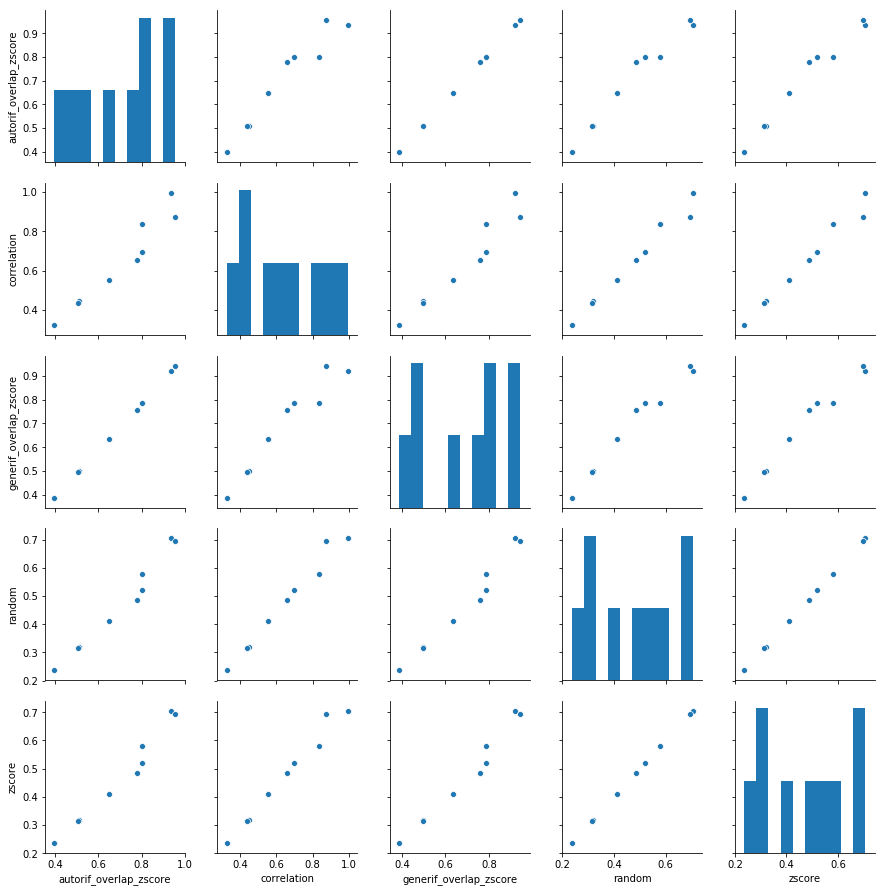

In [109]:
sns.pairplot(frac_cast_dataframe);

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



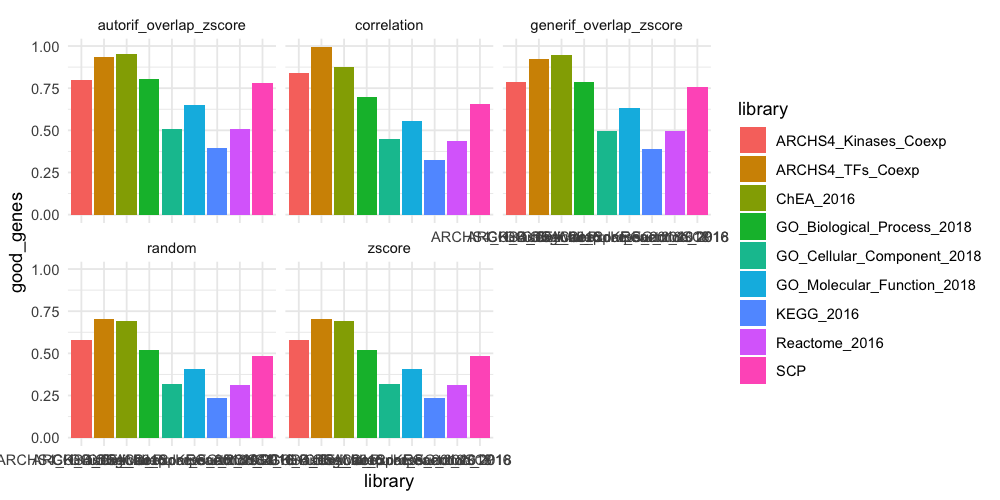

In [110]:
%%R -i frac_dataframe -h 500 -w 1000 -r 120
ggplot(frac_dataframe, aes(x=library, y=good_genes, fill=library)) +
    geom_bar(stat='identity') + 
    facet_wrap(~normalization) +
    theme_minimal()

/Users/denis/anaconda3/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning:

from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.



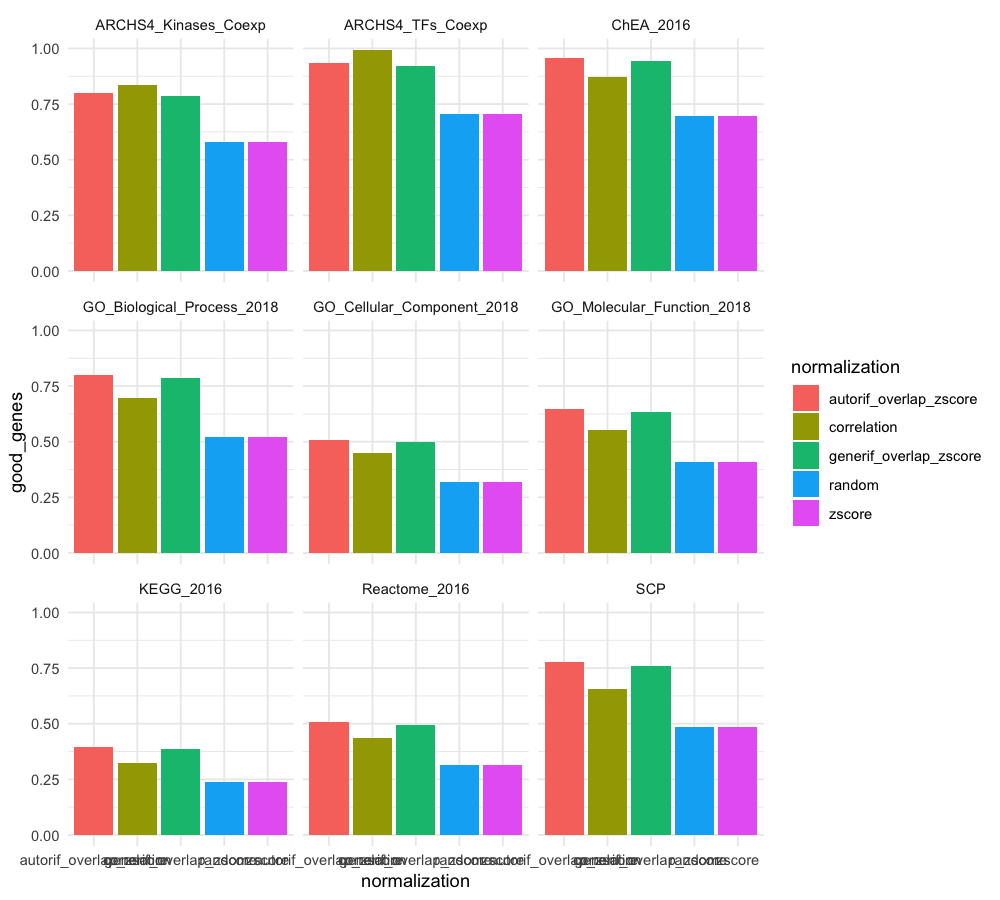

In [114]:
%%R -i frac_dataframe -h 900 -w 1000 -r 120
ggplot(frac_dataframe, aes(x=normalization, y=good_genes, fill=normalization)) +
    geom_bar(stat='identity') + 
    facet_wrap(~library) +
    theme_minimal()